In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
# Load the dataset
df = pd.read_csv("market_data.csv", parse_dates=["Date"])

df.head()

,Date,Price,Inflation_Rate,Interest_Rate,Oil_Price,USD_Index
0,2019-01-01,52.483571,3.374643,7.973413,42.821865,89.697115
1,2019-01-02,49.390825,1.040525,5.496287,40.614753,91.357053
2,2019-01-03,53.402736,3.544384,6.874843,41.981397,89.828602
3,2019-01-04,57.861590,4.653148,3.961646,38.516813,91.504444
4,2019-01-05,49.157820,3.450294,3.834464,40.199451,90.021955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1827 non-null   datetime64[ns]
 1   Price           1827 non-null   float64       
 2   Inflation_Rate  1827 non-null   float64       
 3   Interest_Rate   1827 non-null   float64       
 4   Oil_Price       1827 non-null   float64       
 5   USD_Index       1827 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 85.8 KB


In [6]:
# -------------------------
# Step 1: Data Cleaning
# -------------------------
# Handle missing values
df = df.fillna(method="ffill")  # Forward fill missing values
df.dropna(inplace=True)  # Drop any remaining NaNs

<ipython-input-6-8a5a9cae303d>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")  # Forward fill missing values


In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# -------------------------
# Step 2: Feature Engineering
# -------------------------
# Extract date-related features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday  # Monday=0, Sunday=6
df["Quarter"] = df["Date"].dt.quarter



In [11]:
# Moving Averages & Lag Features
df["Price_MA7"] = df["Price"].rolling(window=7).mean()  # 7-day Moving Average
df["Price_MA30"] = df["Price"].rolling(window=30).mean()  # 30-day Moving Average
df["Price_Lag1"] = df["Price"].shift(1)  # Previous day's price
df["Price_Lag7"] = df["Price"].shift(7)  # Price 7 days ago


In [12]:
df.head()

,Date,Price,Inflation_Rate,Interest_Rate,Oil_Price,USD_Index,Year,Month,Day,Weekday,Quarter,Price_MA7,Price_MA30,Price_Lag1,Price_Lag7
0,2019-01-01,52.483571,3.374643,7.973413,42.821865,89.697115,2019,1,1,1,1,NaN,NaN,NaN,NaN
1,2019-01-02,49.390825,1.040525,5.496287,40.614753,91.357053,2019,1,2,2,1,NaN,NaN,52.483571,NaN
2,2019-01-03,53.402736,3.544384,6.874843,41.981397,89.828602,2019,1,3,3,1,NaN,NaN,49.390825,NaN
3,2019-01-04,57.861590,4.653148,3.961646,38.516813,91.504444,2019,1,4,4,1,NaN,NaN,53.402736,NaN
4,2019-01-05,49.157820,3.450294,3.834464,40.199451,90.021955,2019,1,5,5,1,NaN,NaN,57.861590,NaN


In [13]:
# -------------------------
# Step 3: Outlier Detection and Removal
# -------------------------
df["zscore"] = zscore(df["Price"])
df = df[(df["zscore"] > -3) & (df["zscore"] < 3)]  # Keep values within 3 standard deviations
df.drop(columns=["zscore"], inplace=True)  # Remove z-score column

In [14]:
df.head()

,Date,Price,Inflation_Rate,Interest_Rate,Oil_Price,USD_Index,Year,Month,Day,Weekday,Quarter,Price_MA7,Price_MA30,Price_Lag1,Price_Lag7
0,2019-01-01,52.483571,3.374643,7.973413,42.821865,89.697115,2019,1,1,1,1,NaN,NaN,NaN,NaN
1,2019-01-02,49.390825,1.040525,5.496287,40.614753,91.357053,2019,1,2,2,1,NaN,NaN,52.483571,NaN
2,2019-01-03,53.402736,3.544384,6.874843,41.981397,89.828602,2019,1,3,3,1,NaN,NaN,49.390825,NaN
3,2019-01-04,57.861590,4.653148,3.961646,38.516813,91.504444,2019,1,4,4,1,NaN,NaN,53.402736,NaN
4,2019-01-05,49.157820,3.450294,3.834464,40.199451,90.021955,2019,1,5,5,1,NaN,NaN,57.861590,NaN


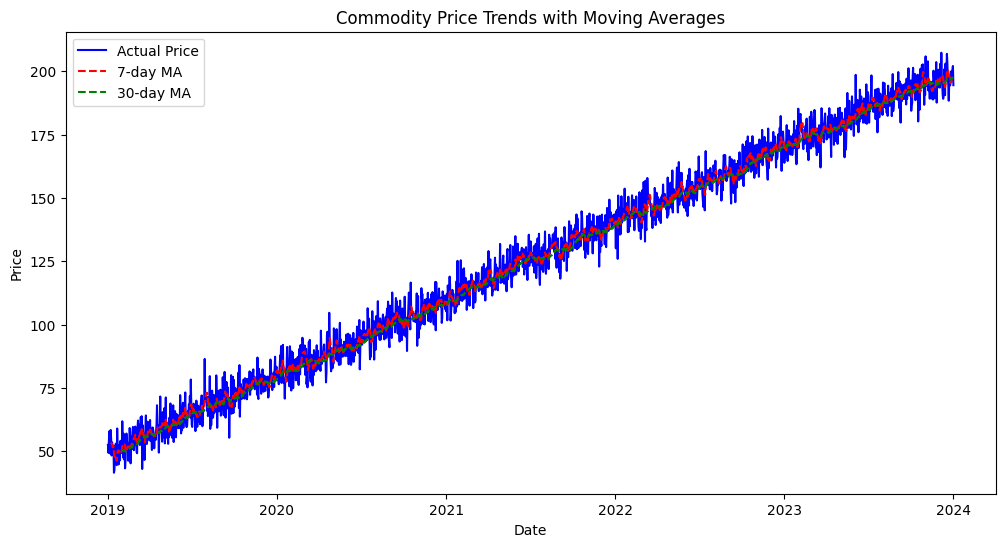

In [15]:
# -------------------------
# Step 4: Data Visualization
# -------------------------
# Plot: Commodity Prices with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Actual Price", color="blue")
plt.plot(df["Date"], df["Price_MA7"], label="7-day MA", color="red", linestyle="dashed")
plt.plot(df["Date"], df["Price_MA30"], label="30-day MA", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Commodity Price Trends with Moving Averages")
plt.legend()
plt.show()

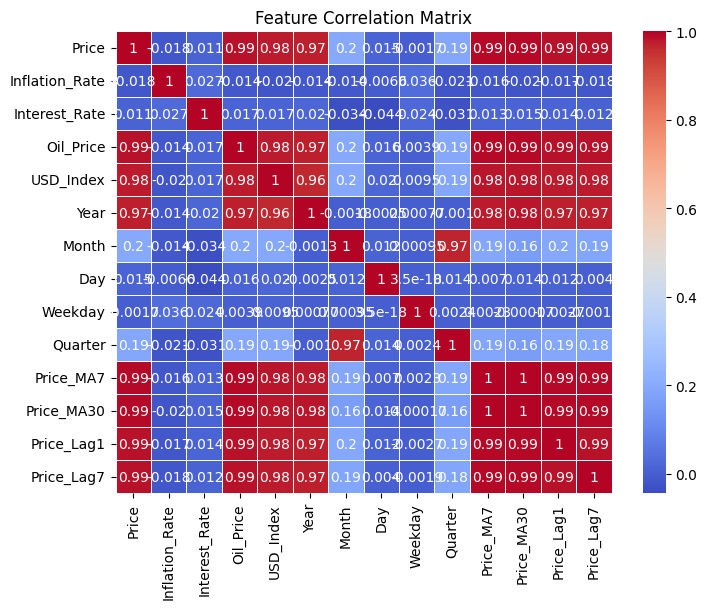

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
# -------------------------
# Step 5: Save the Processed Dataset
# -------------------------
processed_csv_path = "processed_market_data.csv"
df.to_csv(processed_csv_path, index=False)
print(f"✅ Processed Dataset Saved: {processed_csv_path}")

✅ Processed Dataset Saved: processed_market_data.csv
